# Time Series Homework 4
Hasmik Sahakyan

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

from tsfresh import extract_features, extract_relevant_features, select_features
from tsfresh.utilities.dataframe_functions import impute

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score


import pandas as pd
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.cluster import KMeans


# Data Preperaation

In [4]:
# Reading datasets
train_data = pd.read_csv("train.csv", header=None, delimiter="\t")
test_data = pd.read_csv("test.csv", header=None, delimiter="\t")

In [5]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,-0.376936,1.224864,0.343874,0.328454,-0.337609,1.026514,-1.330996,-0.657800,1.446077,-0.846397,...,-1.568165,1.021863,-1.429748,1.356966,1.372781,0.663558,0.918346,-1.311742,-1.197146,1
1,0.644406,0.413269,-0.862278,-1.497386,-0.421458,-0.214215,-1.292131,0.956898,-1.216140,-0.588536,...,-0.802528,-1.121287,0.989319,-1.109687,0.219856,0.630034,1.398140,0.085742,0.024997,1
2,-0.978667,-0.406232,0.822429,-1.408242,-1.676734,-0.490632,1.404598,1.168600,-1.703254,0.972810,...,-0.762884,1.382972,-0.869103,1.277252,-0.198967,0.966809,0.666129,0.106996,0.082715,1
3,-0.236537,-0.098175,0.367092,1.366860,0.498281,-0.300223,1.715634,0.902108,-0.218132,-1.430721,...,-1.499604,0.406744,1.289153,-1.119731,-0.995985,1.651135,-1.187098,0.025463,-0.841518,1
4,1.490735,1.325243,1.626829,-0.317056,-1.098990,-0.022213,0.596980,1.667339,-0.206153,-1.376627,...,1.029995,-1.496161,-1.167442,1.484208,-0.373020,-0.843281,-0.209794,0.137724,0.716542,1


In [6]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,-1.413973,-1.162065,-0.624174,0.939604,-0.527501,0.574787,0.543176,1.748488,-0.505922,0.594644,...,0.404978,-0.894692,-0.363005,1.187356,-0.959220,-0.353210,1.363072,0.725540,-0.880089,1
1,-1.115918,0.237161,1.630814,-1.164521,-0.490658,-1.259363,-0.444532,-0.075867,0.501587,-0.675730,...,-0.275376,-0.397296,0.536837,1.401524,0.813164,0.367139,-1.366535,-0.662661,-1.248914,1
2,-1.285745,-0.067465,-0.555322,1.265105,1.071486,-0.671687,0.165408,-1.248055,0.024684,-0.998072,...,1.650781,-0.942760,-1.383123,-0.764376,-1.370275,0.976808,-1.682904,0.891538,1.552039,1
3,0.104958,1.058988,1.413211,1.219300,0.025581,1.328026,1.506016,-1.324825,-0.477935,0.461873,...,0.154675,-1.795027,-0.244081,1.517773,1.541059,-1.187600,0.738079,0.205016,1.117345,1
4,-0.325845,0.276776,0.711680,1.336955,0.297444,1.209129,-0.468070,1.000695,0.689799,1.354114,...,-1.270352,0.029483,0.740501,0.656075,-1.647922,0.617990,-0.308325,1.294794,-1.177385,1


In [57]:
print("The shape of train data:", train_data.shape)
print("The shape of test data:", test_data.shape)

The shape of train data: (300, 61)
The shape of test data: (300, 61)


In [58]:
train_data.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60],
           dtype='int64')

In [59]:
test_data.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60],
           dtype='int64')

The columns with index 60 contains the classes, values for y

In [7]:
y_train = train_data[60]

In [61]:
y_train

0      1
1      1
2      1
3      1
4      1
      ..
295    6
296    6
297    6
298    6
299    6
Name: 60, Length: 300, dtype: int64

In [62]:
y_train.value_counts()

1    50
2    50
3    50
4    50
5    50
6    50
Name: 60, dtype: int64

In [8]:
# dropping the class column
train_data.drop(columns=[60], inplace=True)

In [9]:
y_test = test_data[60]

In [65]:
y_test

0      1
1      1
2      1
3      1
4      1
      ..
295    6
296    6
297    6
298    6
299    6
Name: 60, Length: 300, dtype: int64

In [66]:
y_test.value_counts()

1    50
2    50
3    50
4    50
5    50
6    50
Name: 60, dtype: int64

In [10]:
# dropping the class column
test_data.drop(columns=[60], inplace=True)

Since the columns in the data are the time steps whereas each row is a measurement of a different observation, we bring it to a format where the time series of different observations are identified by an id and are order by time vertically.

In [11]:
train_data["id"] = train_data.index
train_data = train_data.melt(id_vars="id", var_name="time").sort_values(["id", "time"]).reset_index(drop=True)
train_data.head()


,id,time,value
0,0,0,-0.376936
1,0,1,1.224864
2,0,2,0.343874
3,0,3,0.328454
4,0,4,-0.337609


In [28]:
#train_data.shape

(18300, 3)

c:\Python310\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


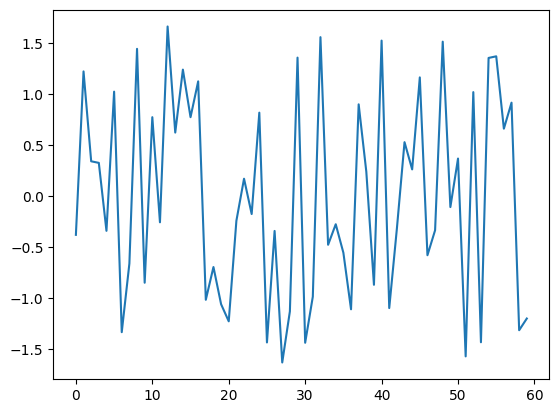

In [69]:
plt.plot(train_data[train_data["id"] == 0].set_index("time").value)
plt.show()

In [12]:
test_data["id"] = test_data.index
test_data = test_data.melt(id_vars="id", var_name="time").sort_values(["id", "time"]).reset_index(drop=True)
test_data.head()

,id,time,value
0,0,0,-1.413973
1,0,1,-1.162065
2,0,2,-0.624174
3,0,3,0.939604
4,0,4,-0.527501


c:\Python310\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


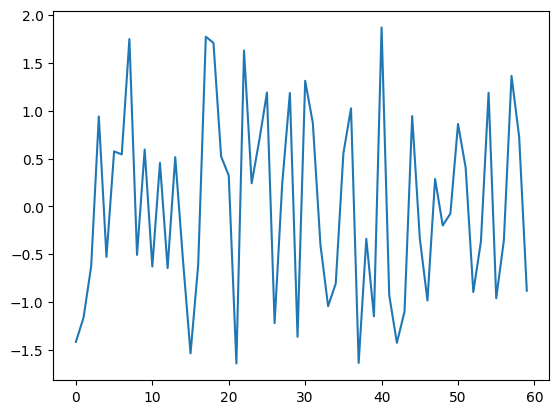

In [71]:
plt.plot(test_data[test_data["id"] == 0].set_index("time").value)
plt.show()

# Feature Engineering and Selection

We here will extract features using TSFresh and select important features based on relevance to the target variable. This step is crucial for improving model performance and reducing dimensionality.

In [13]:
extracted_features_train = extract_features(train_data, column_id = "id", column_sort = "time",  impute_function=impute)
extracted_features_train.head()

Feature Extraction: 100%|██████████| 20/20 [00:15<00:00,  1.29it/s]


,value__variance_larger_than_standard_deviation,value__has_duplicate_max,value__has_duplicate_min,value__has_duplicate,value__sum_values,value__abs_energy,value__mean_abs_change,value__mean_change,value__mean_second_derivative_central,value__median,...,value__fourier_entropy__bins_5,value__fourier_entropy__bins_10,value__fourier_entropy__bins_100,value__permutation_entropy__dimension_3__tau_1,value__permutation_entropy__dimension_4__tau_1,value__permutation_entropy__dimension_5__tau_1,value__permutation_entropy__dimension_6__tau_1,value__permutation_entropy__dimension_7__tau_1,value__query_similarity_count__query_None__threshold_0.0,value__mean_n_absolute_max__number_of_maxima_7
0,0.0,0.0,0.0,1.0,6.000000e-08,58.999999,1.217396,-0.013902,-0.012821,-0.205959,...,0.848066,1.425374,2.889206,1.736985,2.805426,3.585825,3.881306,3.988984,0.0,1.558742
1,0.0,0.0,0.0,0.0,-2.200000e-08,59.000000,1.159762,-0.010498,0.001469,-0.045088,...,1.028365,1.660539,3.148793,1.774159,3.010702,3.694190,3.931717,3.988984,0.0,1.696760
2,0.0,0.0,0.0,0.0,-2.120000e-07,59.000000,1.224400,0.017990,-0.005144,0.109996,...,1.146148,1.795960,3.087195,1.774159,3.094059,3.852065,4.007333,3.988984,0.0,1.656866
3,0.0,0.0,0.0,0.0,-5.700000e-08,59.000000,1.197608,-0.010254,-0.008667,-0.063882,...,1.289981,1.853812,3.120953,1.751159,2.941271,3.718945,3.906512,3.988984,0.0,1.585950
4,0.0,0.0,0.0,0.0,-1.162000e-07,59.000000,1.158014,-0.013122,0.006416,-0.043560,...,1.474198,2.111743,3.282951,1.764599,3.008698,3.802554,4.007333,3.988984,0.0,1.576152


In [74]:
extracted_features_train.shape

(300, 783)

We have constructed 783 features

In [30]:
# Selecting important features
important_features_train = select_features(extracted_features_train, y_train)

In [82]:
# Display important features
important_features_train.head() 

,value__fourier_entropy__bins_2,value__fourier_entropy__bins_5,value__fourier_entropy__bins_3,value__number_crossing_m__m_0,value__partial_autocorrelation__lag_1,value__mean_abs_change,value__autocorrelation__lag_1,"value__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.0",value__cid_ce__normalize_False,value__cid_ce__normalize_True,...,"value__change_quantiles__f_agg_""mean""__isabs_False__qh_0.8__ql_0.2","value__change_quantiles__f_agg_""mean""__isabs_False__qh_0.6__ql_0.0","value__fft_coefficient__attr_""real""__coeff_16","value__cwt_coefficients__coeff_10__w_10__widths_(2, 5, 10, 20)",value__partial_autocorrelation__lag_5,"value__fft_coefficient__attr_""imag""__coeff_2","value__fft_coefficient__attr_""imag""__coeff_12","value__agg_linear_trend__attr_""intercept""__chunk_len_10__f_agg_""max""","value__fft_coefficient__attr_""angle""__coeff_10","value__fft_coefficient__attr_""imag""__coeff_17"
0,0.239217,0.848066,0.379535,32.0,-0.123085,1.217396,-0.123085,2.215175,11.432705,11.529186,...,0.105263,0.052665,1.580024,1.604817,-0.027853,-4.028028,2.746472,1.530081,-105.743366,-7.189318
1,0.384543,1.028365,0.716141,26.0,0.072109,1.159762,0.072109,1.851027,10.450698,10.538891,...,-0.011765,0.065300,4.099613,-0.566201,-0.020408,12.242816,-1.409164,1.385993,110.047824,-13.188953
2,0.441803,1.146148,0.716141,31.0,-0.122233,1.224400,-0.122233,2.223718,11.455061,11.551730,...,0.138157,0.187398,-3.702026,-0.511422,0.048726,2.243781,-2.560635,1.339910,-52.087194,9.422304
3,0.384543,1.289981,0.845900,28.0,-0.051836,1.197608,-0.051836,2.088889,11.101830,11.195518,...,-0.139526,0.014822,5.071225,1.375782,-0.020845,-12.372583,-5.270641,1.492185,168.625505,7.801563
4,0.667432,1.474198,1.034079,30.0,0.016538,1.158014,0.016538,1.920934,10.646374,10.736219,...,0.196201,0.027810,-10.761584,0.432556,-0.031202,1.974375,-8.065209,1.462772,-18.800190,0.675594


In [31]:
important_features_train.shape

(300, 384)

We have decreased the number of features from 783 to 384 keeping only the important features. 

In [32]:
extracted_features_test = extract_features(test_data, column_id = "id", column_sort = "time",  impute_function=impute)
extracted_features_test.head()

Feature Extraction: 100%|██████████| 20/20 [00:14<00:00,  1.34it/s]


,value__variance_larger_than_standard_deviation,value__has_duplicate_max,value__has_duplicate_min,value__has_duplicate,value__sum_values,value__abs_energy,value__mean_abs_change,value__mean_change,value__mean_second_derivative_central,value__median,...,value__fourier_entropy__bins_5,value__fourier_entropy__bins_10,value__fourier_entropy__bins_100,value__permutation_entropy__dimension_3__tau_1,value__permutation_entropy__dimension_4__tau_1,value__permutation_entropy__dimension_5__tau_1,value__permutation_entropy__dimension_6__tau_1,value__permutation_entropy__dimension_7__tau_1,value__query_similarity_count__query_None__threshold_0.0,value__mean_n_absolute_max__number_of_maxima_7
0,0.0,0.0,0.0,0.0,-1.700000e-08,58.999999,1.214027,0.009049,-0.016013,-0.136742,...,1.362706,1.872658,3.148793,1.760229,2.922598,3.718945,3.982128,3.988984,0.0,1.714328
1,0.0,0.0,0.0,0.0,6.600000e-08,59.000000,1.166031,-0.002254,-0.016718,-0.081832,...,1.112759,1.471607,3.076234,1.743864,2.932797,3.743700,3.956922,3.988984,0.0,1.622180
2,0.0,0.0,0.0,0.0,-3.500000e-08,59.000000,1.250022,0.048098,-0.004808,-0.049302,...,1.229834,1.858856,3.059355,1.697785,2.869523,3.759112,3.982128,3.988984,0.0,1.636672
3,0.0,0.0,0.0,0.0,-1.787000e-07,59.000000,0.965536,0.017159,-0.000359,0.121077,...,1.246713,1.778084,3.059355,1.749155,2.942486,3.718945,3.956922,3.988984,0.0,1.688231
4,0.0,0.0,0.0,0.0,2.088000e-07,58.999999,1.167401,-0.014433,-0.026507,0.154407,...,1.164783,1.804627,3.042476,1.783613,3.069738,3.876820,3.982128,3.988984,0.0,1.571745


In [33]:
# keeping selected important features in the test data
important_features_test = extracted_features_test[important_features_train.columns]

In [87]:
important_features_test

,value__fourier_entropy__bins_2,value__fourier_entropy__bins_5,value__fourier_entropy__bins_3,value__number_crossing_m__m_0,value__partial_autocorrelation__lag_1,value__mean_abs_change,value__autocorrelation__lag_1,"value__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.0",value__cid_ce__normalize_False,value__cid_ce__normalize_True,...,"value__change_quantiles__f_agg_""mean""__isabs_False__qh_0.8__ql_0.2","value__change_quantiles__f_agg_""mean""__isabs_False__qh_0.6__ql_0.0","value__fft_coefficient__attr_""real""__coeff_16","value__cwt_coefficients__coeff_10__w_10__widths_(2, 5, 10, 20)",value__partial_autocorrelation__lag_5,"value__fft_coefficient__attr_""imag""__coeff_2","value__fft_coefficient__attr_""imag""__coeff_12","value__agg_linear_trend__attr_""intercept""__chunk_len_10__f_agg_""max""","value__fft_coefficient__attr_""angle""__coeff_10","value__fft_coefficient__attr_""imag""__coeff_17"
0,0.571023,1.362706,0.852395,32.0,-0.075989,1.214027,-0.075989,2.102348,11.137476,11.231465,...,-0.008575,0.012148,-9.586491,0.144509,0.025264,5.217391,2.291227,1.755101,26.985229,-2.078530
1,0.441803,1.112759,0.614524,30.0,-0.094398,1.166031,-0.094398,2.138101,11.231573,11.326356,...,0.159924,0.188195,-6.388559,-0.815788,0.043996,7.316860,2.194691,1.640640,-59.612032,1.154918
2,0.384543,1.229834,0.787235,35.0,-0.117409,1.250022,-0.117409,2.159744,11.294309,11.389621,...,-0.419152,-0.174747,-9.085853,-0.465676,0.085500,3.174915,4.358237,1.339533,147.125209,6.652287
3,0.384543,1.246713,0.787235,20.0,0.291191,0.965536,0.291191,1.405684,9.107838,9.184698,...,0.032305,0.042211,-5.481290,-0.435178,-0.187882,5.166796,2.184969,1.021252,-42.078626,6.463731
4,0.384543,1.164783,0.716141,30.0,0.031056,1.167401,0.031056,1.913419,10.625630,10.715299,...,0.002178,0.116031,-2.248460,1.364867,0.090678,-2.188763,1.344278,1.139553,84.358070,2.041303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.142506,0.283936,0.283936,11.0,0.573948,0.735317,0.573948,0.864316,7.141842,7.202112,...,-0.057982,0.030692,2.067018,1.006847,0.139482,-2.558644,-1.499953,1.749178,60.912318,1.519348
296,0.239217,0.424254,0.283936,1.0,0.756098,0.515434,0.756098,0.443553,5.128736,5.172017,...,-0.031443,0.005153,1.817816,1.692350,-0.038627,-5.787738,-1.147638,1.768272,-179.868667,-1.978580
297,0.239217,0.518700,0.379535,19.0,0.569224,0.780154,0.569224,0.867374,7.154984,7.215365,...,-0.076162,-0.060886,0.010520,3.384551,0.045571,-9.679591,3.399952,1.859425,168.080011,1.256080
298,0.239217,0.424254,0.379535,13.0,0.681183,0.582157,0.681183,0.569801,5.812218,5.861268,...,0.015232,-0.034436,1.410897,4.277778,0.041144,-16.758369,3.203971,1.946736,-126.636446,1.958297


# Model Training and Evaluation
Applying different ML models to classify time Series

We will apply several machine learning models (Decision Tree, Random Forest and etc.) and evaluated them using classification reports. This provides insights into model performance and helps in selecting the best-performing model.

In [17]:
model_dt = DecisionTreeClassifier()
model_dt.fit(important_features_train, y_train)
print(classification_report(y_test, model_dt.predict(important_features_test)))

              precision    recall  f1-score   support

           1       0.98      1.00      0.99        50
           2       1.00      0.98      0.99        50
           3       1.00      1.00      1.00        50
           4       0.96      1.00      0.98        50
           5       1.00      1.00      1.00        50
           6       1.00      0.96      0.98        50

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



In [98]:
model_rf = RandomForestClassifier()
model_rf.fit(important_features_train, y_train)
print(classification_report(y_test, model_dt.predict(important_features_test)))

              precision    recall  f1-score   support

           1       0.98      0.90      0.94        50
           2       1.00      1.00      1.00        50
           3       1.00      1.00      1.00        50
           4       0.96      0.94      0.95        50
           5       1.00      1.00      1.00        50
           6       0.87      0.96      0.91        50

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



In [ ]:
#model_gbm = GradientBoostingClassifier()
#model_knn = KNeighborsClassifier()

In [100]:
y_train.unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [18]:
relevant_features = set()

for label in y_train.unique():
    y_train_binary = y_train == label
    # print(y_train_binary)
    X_train_filtered = select_features(important_features_train, y_train_binary)
    print("Number of relevant features for class {}: {}/{}".format(label, X_train_filtered.shape[1], important_features_train.shape[1]))
    relevant_features = relevant_features.union(set(X_train_filtered.columns))

Number of relevant features for class 1: 164/384
Number of relevant features for class 2: 165/384
Number of relevant features for class 3: 245/384
Number of relevant features for class 4: 249/384
Number of relevant features for class 5: 216/384
Number of relevant features for class 6: 196/384


In [102]:
len(relevant_features)


384

Using this theqnique the number of features to reduce is not possible for this step.

# Hyperparameter Tuning


We will define pipelines and parameter grids for hyperparameter tuning using GridSearchCV. This is a good practice for optimizing model performance.

In [113]:
# Define a pipeline with scaling and classification model
pipeline_dt = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier())
])

pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier())
])

pipeline_svc = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC())
])

pipeline_xgb = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', XGBClassifier())
])

pipeline_gb = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', GradientBoostingClassifier())
])



### Pipeline and Model Selection
We will define pipelines for different classifiers (Decision Tree, Random Forest, SVM, XGBoost) along with their respective parameter grids. This will allow us for a systematic comparison of different models

In [114]:
# Define parameter grids for hyperparameter tuning
param_grid_dt = {
    'classifier__max_depth': [3, 5, 7, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

param_grid_rf = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [3, 5, 7, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

param_grid_svc = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf'],
    'classifier__gamma': ['scale', 'auto']
}

param_grid_xgb = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 5, 7]
}

param_grid_gb = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 5, 7]
}


### Printing Best Parameters and Scores
Here we are printing the best parameters and scores for each model. This step is informative and helps in understanding the hyperparameter tuning process.

In [115]:
# GridSearchCV for Decision Tree
grid_search_dt = GridSearchCV(pipeline_dt, param_grid_dt, cv=5, verbose=1)
grid_search_dt.fit(important_features_train, y_train)

# GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, verbose=1)
grid_search_rf.fit(important_features_train, y_train)

# GridSearchCV for Support Vector Machine (SVM)
grid_search_svc = GridSearchCV(pipeline_svc, param_grid_svc, cv=5, verbose=1)
grid_search_svc.fit(important_features_train, y_train)

# GridSearchCV for XGBoost
grid_search_xgb = GridSearchCV(pipeline_xgb, param_grid_xgb, cv=5, verbose=1)
grid_search_xgb.fit(important_features_train, y_train - 1)

# GridSearchCV for Gradient Boosting
grid_search_gb = GridSearchCV(pipeline_gb, param_grid_gb, cv=5, verbose=1)
grid_search_gb.fit(important_features_train, y_train)



Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        GradientBoostingClassifier())]),
             param_grid={'classifier__learning_rate': [0.01, 0.1, 0.2],
                         'classifier__max_depth': [3, 5, 7],
                         'classifier__n_estimators': [50, 100, 200]},
             verbose=1)

In [116]:
# Print best parameters and score for Decision Tree
print("Best Parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best Score for Decision Tree:", grid_search_dt.best_score_)

# Print best parameters and score for Random Forest
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
print("Best Score for Random Forest:", grid_search_rf.best_score_)

# Print best parameters and score for SVM
print("Best Parameters for SVM:", grid_search_svc.best_params_)
print("Best Score for SVM:", grid_search_svc.best_score_)

# Print best parameters and score for XGBoost
print("Best Parameters for XGBoost:", grid_search_xgb.best_params_)
print("Best Score for XGBoost:", grid_search_xgb.best_score_)

# Print best parameters and score for Gradient Boosting
print("Best Parameters for Gradient Boosting:", grid_search_gb.best_params_)
print("Best Score for Gradient Boosting:", grid_search_gb.best_score_)



Best Parameters for Decision Tree: {'classifier__max_depth': 5, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}
Best Score for Decision Tree: 0.9766666666666666
Best Parameters for Random Forest: {'classifier__max_depth': 3, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
Best Score for Random Forest: 1.0
Best Parameters for SVM: {'classifier__C': 0.1, 'classifier__gamma': 'scale', 'classifier__kernel': 'linear'}
Best Score for SVM: 1.0
Best Parameters for XGBoost: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 200}
Best Score for XGBoost: 0.9700000000000001
Best Parameters for Gradient Boosting: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 50}
Best Score for Gradient Boosting: 0.9700000000000001


c:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predict

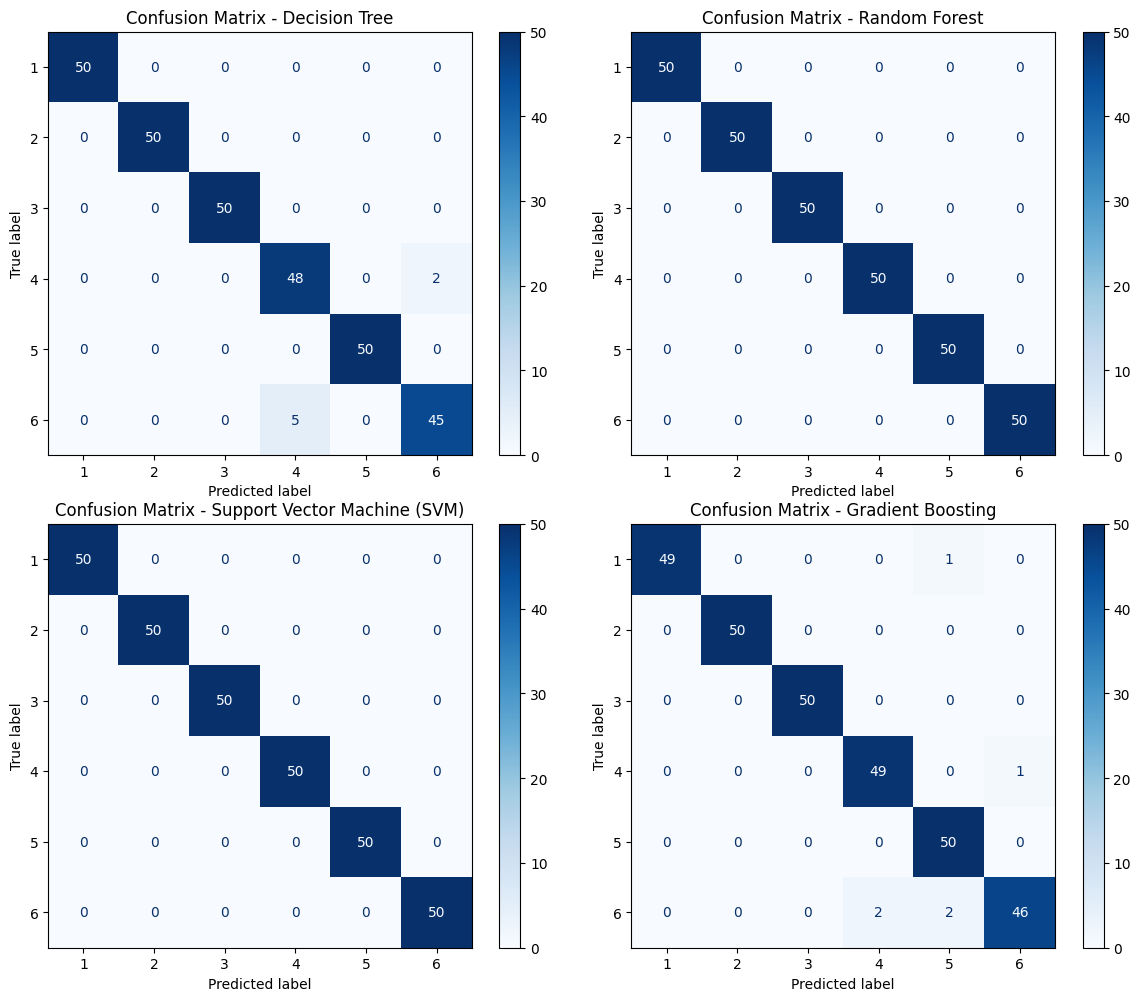

In [126]:
# Visualize confusion matrix for each model
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Decision Tree
plot_confusion_matrix(grid_search_dt, important_features_test, y_test, ax=axes[0, 0], cmap=plt.cm.Blues, display_labels=y_test.unique())
axes[0, 0].set_title('Confusion Matrix - Decision Tree')

# Random Forest
plot_confusion_matrix(grid_search_rf, important_features_test, y_test, ax=axes[0, 1], cmap=plt.cm.Blues, display_labels=y_test.unique())
axes[0, 1].set_title('Confusion Matrix - Random Forest')

# Support Vector Machine (SVM)
plot_confusion_matrix(grid_search_svc, important_features_test, y_test, ax=axes[1, 0], cmap=plt.cm.Blues, display_labels=y_test.unique())
axes[1, 0].set_title('Confusion Matrix - Support Vector Machine (SVM)')

# XGBoost
#plot_confusion_matrix(grid_search_xgb, important_features_test, y_test, ax=axes[1, 1], cmap=plt.cm.Blues, display_labels=y_test.unique())
#axes[1, 1].set_title('Confusion Matrix - XGBoost')

# Gradient Boosting
plot_confusion_matrix(grid_search_gb, important_features_test, y_test, ax=axes[1, 1], cmap=plt.cm.Blues, display_labels=y_test.unique())
axes[1, 1].set_title('Confusion Matrix - Gradient Boosting')


plt.tight_layout()
plt.show()


We can see that decision tree has  some missclassifies cases. For instance, 2 cases with class 4 are classified as class 6. 5 cases of class 6 are classifies as class 4.

Randome Forest and SVM does not have any missclassification and because of that the acuracy of our models for the test set is 1.0.

Gradient Boosting has some minor missclassifications too. For example, one ovservation with class 1 is classified with class 5, one observation with class 4 is classified with 6, and 4 points with class 6 are classifies with 4 and 5 classes(2 by 2).

We can chose Randome forest and SVM as our best models. 

In [109]:
'''from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import shap
'''

c:\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


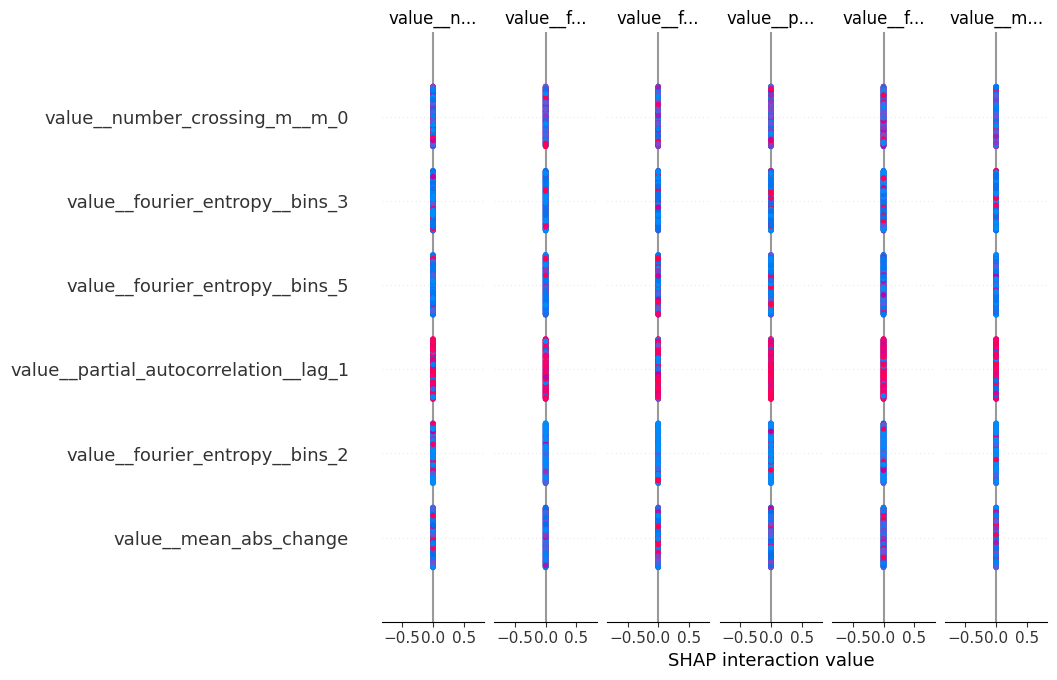

Voting Classifier Accuracy: 0.9933333333333333


In [110]:
'''# 1. Include More Diverse Models
model_gbm = GradientBoostingClassifier()
model_knn = KNeighborsClassifier()

# 2. Ensemble Methods
voting_clf = VotingClassifier([('dt', pipeline_dt), ('rf', pipeline_rf), ('svc', pipeline_svc), ('xgb', pipeline_xgb), ('gbm', model_gbm), ('knn', model_knn)], voting='hard')

# 3. Feature Engineering (Domain-Specific or Handcrafted Features)
# For demonstration purposes, let's create dummy handcrafted features
train_data['mean'] = train_data.groupby('id')['value'].transform('mean')
train_data['std'] = train_data.groupby('id')['value'].transform('std')
test_data['mean'] = test_data.groupby('id')['value'].transform('mean')
test_data['std'] = test_data.groupby('id')['value'].transform('std')

# 4. Dimensionality Reduction (PCA)
pca = PCA(n_components=10)  # Specify number of principal components
X_train_pca = pca.fit_transform(important_features_train)
X_test_pca = pca.transform(important_features_test)

# 5. Model Interpretability (SHAP)
shap.initjs()  # Initialize JS visualization
explainer = shap.TreeExplainer(model_dt)  # Example with Decision Tree, replace with any model of interest
shap_values = explainer.shap_values(important_features_train)  # Calculate SHAP values
shap.summary_plot(shap_values, important_features_train)  # Summary plot for feature importance

# Finally, fit and evaluate the voting classifier
voting_clf.fit(important_features_train, y_train)
print("Voting Classifier Accuracy:", voting_clf.score(important_features_test, y_test))
'''


# Clustering

In [19]:
'''import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler'''

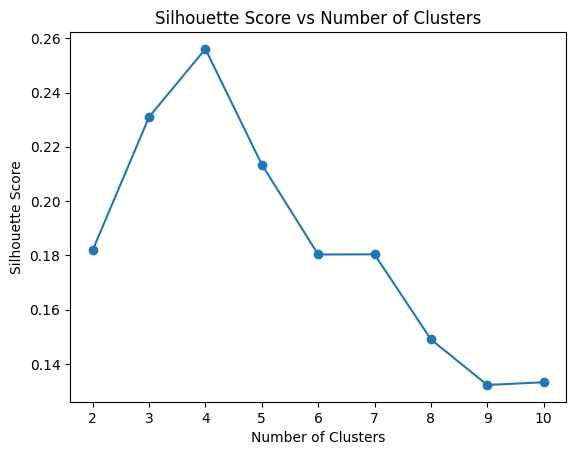

In [20]:
'''# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(important_features_train)

# Find optimal number of clusters using silhouette score
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()

'''

In [21]:
'''# Based on the plot, selecting the number of clusters
optimal_n_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
print("Optimal number of clusters:", optimal_n_clusters)

# Performing clustering with optimal number of clusters
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)

# Adding cluster labels to the original dataframe
important_features_train['Cluster'] = cluster_labels

# Save the clustered data
important_features_train.to_csv('clustered_data.csv', index=False)
'''


Optimal number of clusters: 4


### Elbow Method

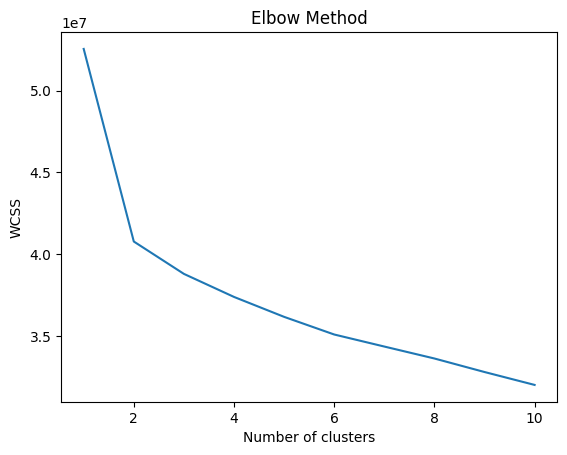

In [34]:
# Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(important_features_train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



In [68]:
# Based on the elbow method or other techniques, determine the optimal number of clusters
num_clusters = 5

# Train the KMeans clustering model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(important_features_train, y_train)

KMeans(n_clusters=5, random_state=42)

In [69]:
# Assign clusters to test data
test_cluster_labels = kmeans.predict(important_features_test)

In [70]:
# Evaluate the accuracy of clustering
# Since we have labels for test data, we can compare the cluster assignments with the true labels
test_labels = y_test 

# Map cluster labels to match the labels in test data
# This step is necessary because the cluster labels may not align perfectly with the true labels
cluster_label_mapping = {}  # Create a mapping from cluster labels to true labels
for cluster_label in range(num_clusters):
    cluster_indices = (test_cluster_labels == cluster_label)
    cluster_assigned_labels = test_labels[cluster_indices]
    # Determine the most frequent true label in this cluster
    most_frequent_label = cluster_assigned_labels.mode()[0]
    cluster_label_mapping[cluster_label] = most_frequent_label

# Map cluster labels to true labels for the entire test data
predicted_labels = [cluster_label_mapping[label] for label in test_cluster_labels]

# Evaluate the accuracy of the clustering
clustering_accuracy = accuracy_score(test_labels, predicted_labels)
print("Clustering accuracy:", clustering_accuracy)


Clustering accuracy: 0.48333333333333334


A clustering accuracy of 0.48 indicates that the clustering model is not performing very well in accurately assigning observations to clusters compared to the true labels. There could be several reasons for such a low accuracy.

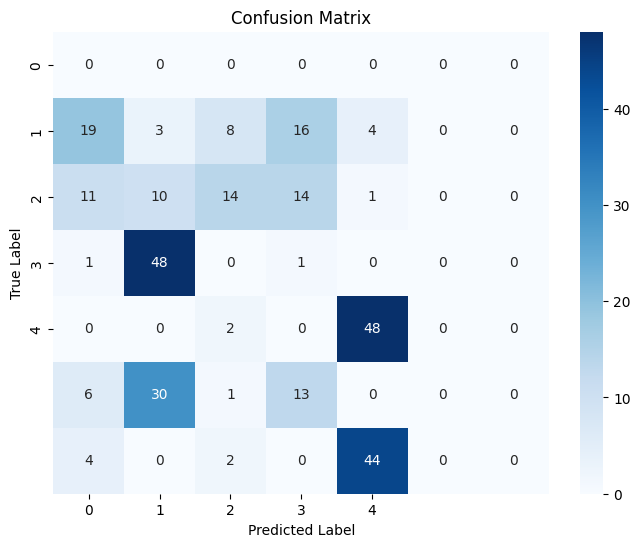

In [71]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Plot Confusion Matrix
conf_matrix = confusion_matrix(test_labels, test_cluster_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(num_clusters), yticklabels=range(num_clusters))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()